<h2 align="center">Engineering 10 Final Project</h2>

Importing libraries and converting csv file to pandas dataframe

In [6]:
import pandas as pd
import numpy as np
f = pd.read_csv('catapult_data.csv')     #convert csv file to dataframe
f

,Machine,Projectile,Operator,Measured By,Date,Time,Location,Distance (cm),Deviation (cm),Time in Flight (optional),Release angle (catapults),Weight of counterweight (Keva Trebuchet),Comments
0,Eisco Trebuchet,1.0,Prof Witmer,Mrs. Witmer,9/7/2021,7:03:00 PM,Witmer Home,226.0,8 to left,NaN,NaN,NaN,––––––
1,Eisco Trebuchet,1.0,Prof Witmer,Mrs. Witmer,9/7/2021,7:06:00 PM,Witmer Home,201.0,0,NaN,NaN,NaN,NaN
2,Eisco Trebuchet,1.0,Prof Witmer,Mrs. Witmer,9/7/2021,7:12:00 PM,Witmer Home,220.0,22 to right,NaN,NaN,NaN,NaN
3,Eisco Trebuchet,1.0,Prof Witmer,Mrs. Witmer,9/7/2021,7:19:00 PM,Witmer Home,162.5,5 to left,NaN,NaN,NaN,NaN
4,Eisco Trebuchet,1.0,Prof Witmer,Mrs. Witmer,9/7/2021,7:03:00 PM,Witmer Home,226.0,9 to left,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,Eisco Catapult,7.0,Linkin Chen,Coco Chen,NaN,NaN,NaN,43.0,4 left,NaN,NaN,NaN,NaN
794,Air Academy Catapult,7.0,Ethan Rednor,Ben Pinkney,NaN,NaN,FR402,65.0,8,NaN,160,NaN,NaN
795,Air Academy Catapult,7.0,Ethan Rednor,Ben Pinkney,NaN,NaN,FR402,69.0,3,NaN,160,NaN,NaN
796,Air Academy Catapult,7.0,Ethan Rednor,Ben Pinkney,NaN,NaN,FR402,66.0,2,NaN,160,NaN,NaN


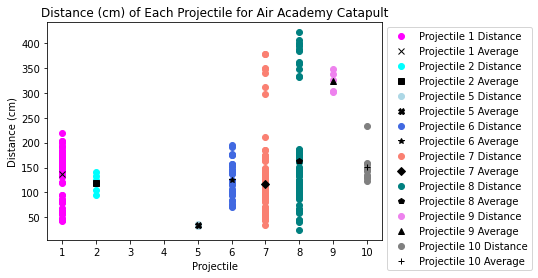

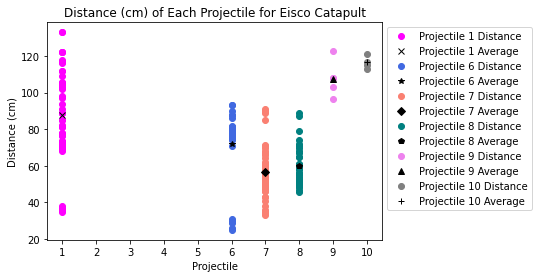

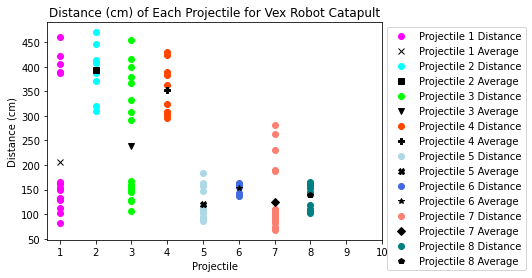

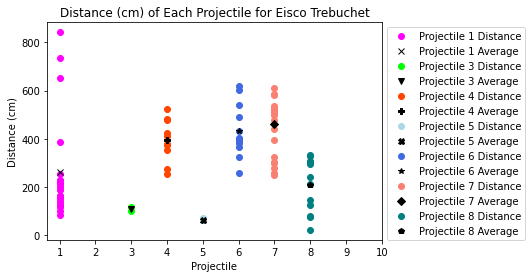

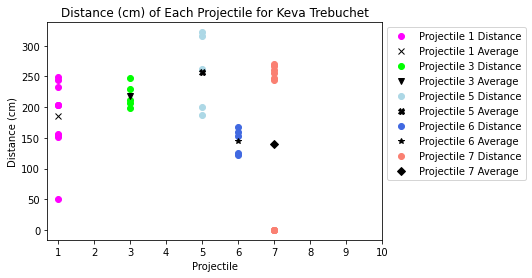

In [8]:
import matplotlib.pyplot as plt
import re

dropped_df = f.dropna(how='any', subset=['Projectile', 'Distance (cm)'])   #drops rows with NaN
df = dropped_df.reset_index(drop=True)     #resets index

#cleans distance data of unwanted characters; leaves just numbers
for i in range(len(df['Distance (cm)'])):
    try:
        df.at[i,'Distance (cm)'] = pd.to_numeric(df['Distance (cm)'][i])
    except ValueError as err:
        df.at[i, 'Distance (cm)'] = re.sub('[^\d.]', '', df.at[i, 'Distance (cm)'])
        df.at[i,'Distance (cm)'] = pd.to_numeric(df['Distance (cm)'][i])
        
distance_std = {}       #dictionary of standard deviations of distances

machine_list = ['Air Academy Catapult', 'Eisco Catapult', 'Vex Robot Catapult', 'Eisco Trebuchet', 'Keva Trebuchet']    #list of machines
projectile_list = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]    #list of projectiles
colors = ['fuchsia','aqua','lime','orangered','lightblue','royalblue','salmon','teal','violet','grey']      #list of colors for points
markers = ['x','s','v','P','X','*','D','p','^','+']      #list of markers for points
projectile_labels = ['Projectile 1 Distance','Projectile 2 Distance','Projectile 3 Distance','Projectile 4 Distance',
                     'Projectile 5 Distance','Projectile 6 Distance','Projectile 7 Distance','Projectile 8 Distance',
                     'Projectile 9 Distance','Projectile 10 Distance']     #list of labels for points
avg_labels = ['Projectile 1 Average','Projectile 2 Average','Projectile 3 Average','Projectile 4 Average',
              'Projectile 5 Average','Projectile 6 Average','Projectile 7 Average','Projectile 8 Average',
              'Projectile 9 Average','Projectile 10 Average']      #list of labels for averages
x_labels = ['1','2','3','4','5','6','7','8','9','10']      #list of labels of x-values for x-axis
graph_titles = ['Distance (cm) of Each Projectile for Air Academy Catapult',
                'Distance (cm) of Each Projectile for Eisco Catapult',
                'Distance (cm) of Each Projectile for Vex Robot Catapult',
                'Distance (cm) of Each Projectile for Eisco Trebuchet',
                'Distance (cm) of Each Projectile for Keva Trebuchet']     #list of titles for each graph

for m in range(len(machine_list)):     #executes for each machine
    machine_df = df[df['Machine'] == machine_list[m]].groupby('Projectile')     #sorts each machine by its projectile
    std_dict = {}       #dictionary for one machine's distance standard deviations
    for p in range(len(projectile_list)):       #executes for each projectile
        try:
            machine_data = machine_df.get_group(projectile_list[p])    #creates dataframe of current projectile and machine's data
            mean = np.mean(machine_data['Distance (cm)'])
            if len(machine_data['Distance (cm)']) > 1:
                std_dict[projectile_list[p]] = round(np.std(machine_data['Distance (cm)'], ddof=1), 2)    #adds standard deviation to dictionary
            plt.plot([p+1]*len(machine_data['Distance (cm)']), machine_data['Distance (cm)'], color=(colors[p]), 
                     marker=('o'), linestyle='', label=(projectile_labels[p]))
            plt.plot(p+1, mean, color='k', marker=(markers[p]), linestyle='', label=(avg_labels[p]))        #plots averages and all data
        except KeyError as err:
            pass
    distance_std[machine_list[m]] = std_dict     #adds each machine's standard deviations to dictionary
    plt.xticks(ticks=projectile_list, labels=x_labels)     #sets x-axis values
    plt.title(graph_titles[m])     #sets graph title
    plt.xlabel('Projectile')     #sets x-axis label
    plt.ylabel('Distance (cm)')     #sets y-axis label
    plt.legend(bbox_to_anchor = (1,1))     #adds legend to right of graph
    plt.show()     #prints graphs

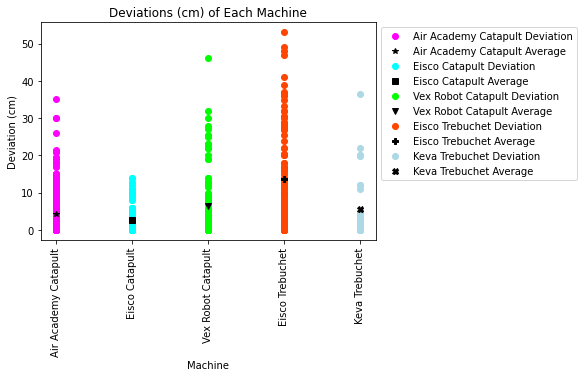

In [9]:
new_df = f.dropna(how='any', subset=['Projectile', 'Deviation (cm)'])    #remove rows with NaN
deviation_df = new_df.reset_index(drop=True)     #reset row indices

for p in range(len(deviation_df['Deviation (cm)'])):            #cleans all deviation values
    try:
        deviation_df.at[p,'Deviation (cm)'] = pd.to_numeric(deviation_df['Deviation (cm)'][p])
        deviation_df.at[p, 'Deviation (cm)'] = abs(deviation_df['Deviation (cm)'][p])
    except ValueError as err:
        deviation_df.at[p, 'Deviation (cm)'] = re.sub('[^\d.]', '', deviation_df.at[p, 'Deviation (cm)'])
        deviation_df.at[p, 'Deviation (cm)'] = pd.to_numeric(deviation_df['Deviation (cm)'][p])
        deviation_df.at[p, 'Deviation (cm)'] = abs(deviation_df['Deviation (cm)'][p])
        
deviation_means = {}      #blank dictionary of each machine's average deviation

machine_list = ['Air Academy Catapult', 'Eisco Catapult', 'Vex Robot Catapult', 'Eisco Trebuchet', 'Keva Trebuchet']    #list of all machines
machine_labels = ['Air Academy Catapult Deviation', 'Eisco Catapult Deviation', 'Vex Robot Catapult Deviation', 
                  'Eisco Trebuchet Deviation', 'Keva Trebuchet Deviation']     #list of all data labels
colors = ['fuchsia','aqua','lime','orangered','lightblue']     #list of colors for data points
markers = ['*','s','v','P','X']      #list of marker shapes for data points
avg_labels = ['Air Academy Catapult Average', 'Eisco Catapult Average', 'Vex Robot Catapult Average',
              'Eisco Trebuchet Average', 'Keva Trebuchet Average']     #list of average labels
x_values = [1, 2, 3, 4, 5]     #list of x-axis values

machine_df = deviation_df.groupby('Machine')     #create new dataframe separated by machine

for m in range(len(machine_list)):      #executes for each machine
    try:
        machine_data = machine_df.get_group(machine_list[m])     #create dataframe of current machine's data
        mean = np.mean(machine_data['Deviation (cm)'])
        deviation_means[machine_list[m]] = round(mean, 2)     #add mean to dictionary
        plt.plot([m+1]*len(machine_data['Deviation (cm)']), machine_data['Deviation (cm)'], color=(colors[m]), 
                 marker=('o'), linestyle='', label=(machine_labels[m]))
        plt.plot(m+1, mean, color='k', marker=(markers[m]), linestyle='', label=(avg_labels[m]))   #plots deviations and averages
    except KeyError as err:
        deviation_means[machine_list[m]] = 'No Data'
        pass
plt.xticks(ticks=x_values, labels=machine_list, rotation=90)    #sets new x-values
plt.title('Deviations (cm) of Each Machine')    #sets title
plt.xlabel('Machine')     #sets x-axis label
plt.ylabel('Deviation (cm)')     #sets y-axis label
plt.legend(bbox_to_anchor = (1,1))     #adds legend to right of graph
plt.show()     #prints graph

Edit <strong>this cell</strong> to describe your results in general terms, based on what your visual analysis tells you.

My first set of graphs plotted the distances for each projectile of every machine. This will allow me to compare the distances of the machines with the same projectile. The Vex Catapult had some of the highest average distances, but there was no consistency in the data. There would be some high and some low distances. The company wants a consistent and reliable catapult. The Eisco Trebuchet was another machine that has high averages without consistency. The Eisco Catapult had the lowest average distances, but it was precise. The expensive Air Academy Catapult did not perform up to its reputation. It was very middle-of-the-road. It did not shoot impressively far or consistently. 

My second graph plotted the deviations from the center for each machine. The Eisco Catapult had the lowest average deviation, meaning it shot the most accurately. It also did not have any outliers that strayed from the rest of the data. The Eisco Trebuchet shot the least accurately with the highest average deviation. It also had many outliers that were concerning. The Eisco Trebuchet did not shoot straight. The expensive Air Academy Catapult did have a low average deviation, but it had many outliers that suggests the catapult does not consistently shoot straight. The high-performing Vex Robot Catapult has the second-highest average deviation and has large outliers.

Overall, the Eisco Catapult was the most consistent but worst performing. The Vex Catapult and Eisco Trebuchet were both high-performing but inconsistent. The Eisco Catapult was also the best at shooting straight, and the Vex Catapult and Eisco Trebuchet were the worst. 

In [10]:
#print(deviation_means)   #dictionary with average deviation of each machine
#print(distance_std)      #dictionary with standard deviations of distances of each projectile of each machine
    
print('Average Standard Deviations of Distances (cm) of Each Machine:')     #prints average standard deviations of distances for each machine
for m,d in distance_std.items():
    machine_std = []
    for v in d.values():
        machine_std.append(v)
    average_std = round(sum(machine_std)/len(machine_std), 2)
    print(m,average_std)
    
print()
print('Average Deviations (cm) of Each Machine:')       #prints average deviations for each machine
for m,d in deviation_means.items():
    print(m, d)

Average Standard Deviations of Distances (cm) of Each Machine:
Air Academy Catapult 40.0
Eisco Catapult 14.1
Vex Robot Catapult 59.3
Eisco Trebuchet 90.38
Keva Trebuchet 59.43

Average Deviations (cm) of Each Machine:
Air Academy Catapult 4.25
Eisco Catapult 2.75
Vex Robot Catapult 6.56
Eisco Trebuchet 13.75
Keva Trebuchet 5.72


Calculates cost of 200 catapults for each machine.

In [11]:
catapults = 200     #amount of catapults
machine_list = ['Air Academy', 'Eisco Catapult', 'Vex Catapult', 'Eisco Trebuchet', 'Keva Trebuchet']   #list of machines
cost_list = [250, 40.09, 17.99, 59.99, 29.95]     #lists of each machine's cost

print('Estimated Cost($)')
print('Machine \t  Cost \t\t  Taxes \t  Shipping \t  Total Cost')

for m in range(len(machine_list)):      #executes for each machine
    print(machine_list[m], end='')
    if machine_list[m] == 'Air Academy':  #executes if the catapult is from Air Academy because they have different costs
        cost = cost_list[m] * catapults
        discount = cost * .2       # finds 20% discount on orders over 5
        actual_cost = cost - discount
        tax = 0      #taxes are included in flat rate for shipping
        ship = 300      # $300 shipping flat rate for orders over 15
        total_cost = actual_cost + tax + ship
        print('\t', f'{actual_cost: .2f}', '\t', f'{tax: .2f}', '\t\t', f'{ship: .2f}', '\t', f'{total_cost: .2f}')
    else:
        cost = cost_list[m] * catapults
        taxes = cost * .029       #amazon uses 2.9% sales tax
        shipping = 0       #free shipping with amazon prime
        total = cost + taxes + shipping
        print('\t', f'{cost: .2f}', '\t', f'{taxes: .2f}', '\t', f'{shipping: .2f}', '\t\t', f'{total: .2f}')

Estimated Cost($)
Machine 	  Cost 		  Taxes 	  Shipping 	  Total Cost
Air Academy	  40000.00 	  0.00 		  300.00 	  40300.00
Eisco Catapult	  8018.00 	  232.52 	  0.00 		  8250.52
Vex Catapult	  3598.00 	  104.34 	  0.00 		  3702.34
Eisco Trebuchet	  11998.00 	  347.94 	  0.00 		  12345.94
Keva Trebuchet	  5990.00 	  173.71 	  0.00 		  6163.71


Edit <strong>this cell</strong> to summarize your justification for your selected catapult.

I recommend that the company buys the Eisco Catapult because it was had the best performance and for an affordable price. The Eisco Catapult performed the best overall, even better than the expensive Air Academy Catapult, and it has a reasonable price. It had the lowest average standard deviation of distances, meaning it produces very reliable and consistent results. It also had the lowest average deviation from the center, meaning it is the machine that shoots the most straight. It only costs 8,250.52 dollars for 200 catapults, which is a drastic drop from the 40,300.00 dollars for the recommended Air Academy Catapult that does not perform remotely as well as the Eisco Catapult. The Eisco Catapult is easy to use and is durable. It was easy to assemble and has quick, cheap delivery with good customer support through Amazon. The only places that the catapult lacked was in the distance it shot and its versatility. The distance it shoots is not very important during the training. A powerful catapult could even be seen as a negative in a small office space. The versatility of the catapult also is not a satisfactory compared to the Air Academy Catapult, but it still has different settings for different conditions. The versatility is not an important factor because the company can create new conditions is different ways, such as using new projectiles or changing its elevation. On the summary table that I created to evaluate the qualitative factors, the Eisco Catapult received the highest rating with a 25.2 out of 30. The Eisco Catapult is the best option because it is the most consistent catapult with quick, reliable delivery while also not breaking the bank.